# Credit Card Fraud Detection using Unsupervised Learning - SOM

In [1]:
# Import the libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Import dataset
dataset = pd.read_csv("./Self_Organizing_Maps/Credit_Card_Applications.csv")

'''
Link: http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

There are 6 numerical and 8 categorical attributes. Looking at the dataset it is quite complicated for us to detect fraud.
Hence, we are performing unsupervised learning.
'''


'\nLink: http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)\n\nThere are 6 numerical and 8 categorical attributes. Looking at the dataset it is quite complicated for us to detect fraud.\nHence, we are performing unsupervised learning.\n'

In [4]:
dataset.columns

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [5]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
dataset.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


Here the model will perform customer segmentation to identify the segments of customers & one of the segments will contain 
the customers that potentially cheated.
<br>
These customers are the input to our Neural network. For each customer/observation point, the output of this customer will 
be a neuron that is closest to the customer. This neuron is called the winning node. For each customer, the winning node 
is the most similar neuron to the customer. We then use the neighbourhood function like the guassian neighbourhood
function to update the weights of the neighbourhood winning node to move them closer to the point. And we do this for all 
the customers in the input space & we repeat this many times (epoch). And each time we repeat it, the output space decreases & losses dimensions. It reduces its dimensions little by little and then it reaches a point where neighbourhood stops decreasing, where the outer space stops decreasing. And then we obtain our SOM in 2D space with all the winning nodes that were eventually identified. Now we get closer to frauds/outliers/ outlying neurons.<br>
Outlying neurons basically don't follow the general rule other neurons are following. To find these neurons we use **Mean Interneuron Distance (MID).** Higher the MID value, farther will be the outlier from regular neurons. <br>
In our SOM, for each neuron we will calculate the Mean of the Euclidian distance between the neurons & its neighbourhood neurons. This neighbourhood we will manually define. Thus using this we can find outliers as they will be far from all the regular neurons in its neighbourhood.<br>
Then we use the Inverse Mapping function to find which customers in the input space are associated with the winning nodes/outliers.
<br><br>
**Note:** Learning rates and neighborhood functions are necessary parameters that influence the SOM results.
Bubble and Gaussian neighborhood functions and three learning rates (linear, inverse of time and power series) are
analyzed by varying iteration. The quality of SOM is measured by the quantization error. 


## Step 1: Data Preprocessing

In [7]:
'''
Here, the Class column tells if the application of the customer was approved(1) or not(0).
So we split the dataset into 2 - customers whose application was approved & the ones who's application was not approved.
This will allow to prioritize the search to identify the frauds whose application was approved.
'''

X = dataset.iloc[:,:-1].values  # [:,:-1] -> all rows & allcolumns except the last column.
y = dataset.iloc[:,-1].values   # [:,-1] -> all values of last class columns

'''
We will only consider X & not y because we are performing unsupervised learning & do not want to involve and dependent 
variable.
'''

'\nWe will only consider X & not y because we are performing unsupervised learning & do not want to involve and dependent \nvariable.\n'

In [8]:
# Feature Scaling
'''It's much easier for our DL model to train on feature scaled dataset. '''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))  # feature_range -> we want our dataset to be in range 0 to 1

X = scaler.fit_transform(X) # fit(X) provides all the info scaler needs to perform normalization & transform(X) stores the normalized value in X

## Training the SOM

We can either create SOM from scratch or use a library developed by other developers.
Here we use SOM made by MiniSOM.

In [9]:
!pip install MiniSom

  Using cached MiniSom-2.2.6.tar.gz (8.2 kB)
  Created wheel for MiniSom: filename=MiniSom-2.2.6-py3-none-any.whl size=8530 sha256=22bcb86cf783c1a0514f49816e4a045c54bf1d58d691c4f18888027536df533a
  Stored in directory: c:\users\work is fun\appdata\local\pip\cache\wheels\2a\0e\9e\6500009288a2a348561306008bd82dad4b47d7766966d92bac
Successfully built MiniSom


In [10]:
from minisom import MiniSom

In [11]:
# Define SOM object
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)  # This object is a SOM that will be trained on X only

'''
MiniSom(x,y, input_len, sigma, learning_rate, decay_function, random_seed)

x, y -> width & height of the map/grid we want. It shouldn't be too  small, that we cannot locate the outliers.
input_len -> no. of features we have in our dataset - 'X'. Here we have 14 features + 1 customer id. Although customer id
       has no significance on pattern, We would need it for future to identify the potential cheaters. 
       So we set input_len to 15.
sigma -> radius of the different neighbourhoods in the grid. (default = 1.0)
learning_rate -> hyper parameter that decides by how much the weights are updated during each iteration. Higher the
        learning rate, faster is the convergence & lower the learning rate, longer the time SOM will take to build.
        (default = 0.5)
decay_function -> used to improve the convergence. (default = None)
random_seed -> (default = None)
'''

"\nMiniSom(x,y, input_len, sigma, learning_rate, decay_function, random_seed)\n\nx, y -> width & height of the map/grid we want. It shouldn't be too  small, that we cannot locate the outliers.\ninput_len -> no. of features we have in our dataset - 'X'. Here we have 14 features + 1 customer id. Although customer id\n       has no significance on pattern, We would need it for future to identify the potential cheaters. \n       So we set input_len to 15.\nsigma -> radius of the different neighbourhoods in the grid. (default = 1.0)\nlearning_rate -> hyper parameter that decides by how much the weights are updated during each iteration. Higher the\n        learning rate, faster is the convergence & lower the learning rate, longer the time SOM will take to build.\n        (default = 0.5)\ndecay_function -> used to improve the convergence. (default = None)\nrandom_seed -> (default = None)\n"

In [12]:
# Initialize Random weights
som.random_weights_init(X)        # random_weights_init(data) 

In [24]:
# Train the SOM on X & identify patterns
som.train_random(data = X, num_iteration=100)       # train_random(data, num_iteration -> no. of times data should be repeated on model)

'\nIf you observe, the MIDs value are from 0 to 1 (since we have scaled the values).\nThe highest MId =1, corresponds to white color & represents outliers.\n'

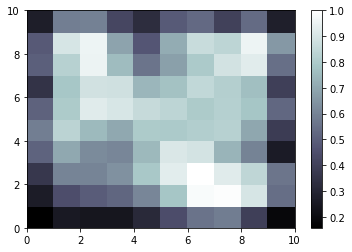

In [25]:
# Visualizing the results
'''
For each neuron, we will find MID, & the winning nodes/outliers will be the neurons with higher MID.
We use colors to find outliers.
'''
from pylab import bone, pcolor, colorbar, plot, show

## Initialize the figure - i.e. define the window that will contain the map
bone()

## Put different winning nodes on map 
'''
This is done by adding the information of MID for all the winning nodes that the SOM identified on the map.
We are not adding figures/mathematical values of MID, instead we will use colors.
Different colors correspond to different range values of MID.
To find MID, we use Distance Map Method.
'''
pcolor(som.distance_map().T)    # add all MID values to pcolor(). 
                                # distance_map returns all MIDs in one matrix
                                # .T will transpose the matrix which is the required format for pcolor()
        
# update legend 
colorbar()

'''
If you observe, the MIDs value are from 0 to 1 (since we have scaled the values).
The highest MId =1, corresponds to white color & represents outliers.
'''

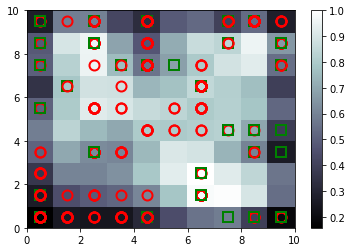

In [26]:
# We can improve the above map by further making a distinction between the customers who get approval & the ones who didn't get approval
'''
Customers who cheated & got approval aremore relevant target to fraud detection than the customers who didn't get 
approval & got cheated.
So we add markers to further highlight this.
'''

## Initialize the figure - i.e. define the window that will contain the map
bone()

pcolor(som.distance_map().T)

# update legend 
colorbar()

# red circles -> customers who didn't get approval
# green square -> customers who got approval
markers = ['o','s']  # o -> circle & s -> square
colors = ['r','g']   # r -> red & g -> green

''' Looop over all the customers & for each customer, we will get a winning node & depending on whether customer 
got approval or not, we color the winning node as red or green.
'''
for i, x in enumerate(X):   # i-> index to move through rows & x -> vector/list of all feature values of a customer at index i.
    
    # Get winning node for a customer
    w = som.winner(x)
    
    # For the above winning node, place the marker on it. 
    # In SOM, each winning node is represented by square as shown in above heatmap.
    # & we basically want to put the marker at the center of the square for which we require its co-ordinates.
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]],
        markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
                            # y[i] = 0 or 1
                            # We are not coloring the marker, bcoz at a winning node, we can have multiple markers

# Show the graph
show()

In [27]:
# Now we find the customer ids where frauds were detected.
# For this we need a mapping of the winning node & the customer id. & we do not have a direct function for this.
# so we manually define the mapping
mappings = som.win_map(X)  

'''
som.win_map(data) returns a dictionary
# keys = winner node coordinates  
# values = list of all customers associated to this winning node (each value of the list contains a list with feature 
                values of the record/customer)
'''
print(mappings)

defaultdict(<class 'list'>, {(4, 9): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
       0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.50077484, 1.        , 0.21052632, 0.04607143, 0.5       ,
       0.23076923, 0.875     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.07      , 0.        ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
       0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.59371959, 1.        , 0.06766917, 0.00589286, 0.5       ,
       0.07692308, 0.375     , 0.00877193, 0.        , 0.        ,
       0.       

In [29]:
# finding frauds using the mapping

# Manually check co-ordinate from SOM (heatmap)
# Using co-ordinates from graph/heatmap, we see a fraud at co-ordinate (6,2) & (6,1) - white squares
frauds = np.concatenate((mappings[(6,1)], mappings[(6,2)]), axis=0)       # Form a list of all potential customers 
                                  # We concat along vertical axis to form a list of all potential fraud customers 
                                  
# Inverse the scaling
frauds = scaler.inverse_transform(frauds)

print(frauds)

'''
column1 of frauds denote the customer Ids
'''

[[1.5796813e+07 1.0000000e+00 4.1580000e+01 1.7500000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 2.1000000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5631685e+07 1.0000000e+00 2.3170000e+01 0.0000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 8.5000000e-02 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5753591e+07 1.0000000e+00 2.6750000e+01 1.1250000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 1.2500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 5.2990000e+03]
 [1.5731166e+07 1.0000000e+00 4.0920000e+01 8.3500000e-01 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.3000000e+02 2.0000000e+00]
 [1.5649379e+07 1.0000000e+00 4.2750000e+01 3.0000000e+00 2.0000000e+00
  3.0000000e+00 5.0000000e+00 1.0000000e+00 1.0000000e+00 0.

'\ncolumn1 of frauds denote the customer Ids\n'

In [30]:
# print the fraud clients
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15796813
15631685
15753591
15731166
15649379
15587297
15682540
15797246
15800773
15729771
15609823
15614813
15594133
15701687
15571081
15706268
15653147
15735572
15751167
15778142
15721507
15802106
15625501
15812918
15715519
15630592
15636562
15711249
15812766
15784526
15687765
15589541
15757306
15700046
15569595
15598574
15587443
15769356
15711759
15665181
15808223
15766183
15808662
15684722
15772329
15734649
15646082
15717629
15757188
15604536
15635598
15647191
15623369
15793896
15650591
15633608
15675450


In [31]:
# Representing the data in dataframe format
frauds_df = pd.DataFrame(frauds, columns=dataset.columns[:-1])

frauds_df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15796813.0,1.0,41.58,1.750,2.0,4.0,4.0,0.210,1.0,0.0,0.0,0.0,2.0,160.0,1.0
1,15631685.0,1.0,23.17,0.000,2.0,13.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,0.0,1.0
2,15753591.0,1.0,26.75,1.125,2.0,14.0,8.0,1.250,1.0,0.0,0.0,0.0,2.0,0.0,5299.0
3,15731166.0,1.0,40.92,0.835,2.0,1.0,1.0,0.000,1.0,0.0,0.0,0.0,2.0,130.0,2.0
4,15649379.0,1.0,42.75,3.000,2.0,3.0,5.0,1.000,1.0,0.0,0.0,0.0,2.0,0.0,201.0
5,15587297.0,1.0,18.42,10.415,1.0,6.0,4.0,0.125,1.0,0.0,0.0,0.0,2.0,120.0,376.0
6,15682540.0,1.0,62.50,12.750,1.0,8.0,8.0,5.000,1.0,0.0,0.0,0.0,2.0,112.0,1.0
7,15797246.0,1.0,23.42,0.585,2.0,8.0,8.0,0.085,1.0,0.0,0.0,0.0,2.0,180.0,1.0
8,15800773.0,1.0,54.42,0.500,1.0,4.0,8.0,3.960,1.0,0.0,0.0,0.0,2.0,180.0,315.0
9,15729771.0,1.0,43.17,2.250,2.0,3.0,5.0,0.750,1.0,0.0,0.0,0.0,2.0,560.0,1.0


Analyst will further lookout for approved customers from this list of potential cheaters & investigate if they really cheated.